# Lab01
##### Author: Kevin Egedy
##### Due: January 22, 2019

##### I. Measurement of the verification devices:

- Match the waveforms to the three loads: short, open and match, and find the reflection coefficient of each.

#####  II. Unmatached TL:

- Identify the location of the impedance discontinuity.
- Evaluate the values of characteristic impedance of each TL section of the board. Main one is 100 ohm section.
- Estimate the dielectric constant of 100 ohm TL.

#####  III. Unknown loads:

- Based on the expected responses and the time-domain responses of complex loads, estimate the characteristics (capacitive, resistive, inductive, or combination of these?) and values of these loads(include the analysis process)

#####  IV. Small Inductance

- From the measured decay constant, using the relation $L = R_st$, compute the inductance of the DUT. If the decay time is too short, skip this part.
- From the measured total area under a response curve, compute the inductance of the DUT.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
files = [
    'calib_matched_garman',
    'calib_open_garman',
    'calib_short_garman',
    'Part1-PCBduroid',
    'Part1-unknown1',
    'Part1-unknown2',
    'Part1-unknown3_1ns',
    'Part1-unknown3_260ps',
    'Part2-board2_280ps',
    'Part2-calib_ch2_Thu'
]

In [3]:
# Read .xlsx files and convert them into .csv
#
for filename in files:
    df = pd.read_excel(f'data/{filename}.xlsx',header=None,nrows=1)
    with open(f'data/csv/{filename}.csv','w+') as f0: f0.write(df.T.to_csv(index=False));

36266

36212

39440

35560

36591

35781

35858

35594

35660

36091

In [4]:
# Read .csv files in lab01/data/csv
#
calib_matched_garman = pd.read_csv('data/csv/calib_matched_garman.csv',header=None).to_numpy()
calib_open_garman = pd.read_csv('data/csv/calib_open_garman.csv',header=None).to_numpy()
calib_short_garman = pd.read_csv('data/csv/calib_short_garman.csv',header=None).to_numpy()[1:]
Part1_PCBduroid = pd.read_csv('data/csv/Part1-PCBduroid.csv',header=None).to_numpy()[1:]
Part1_unknown1 = pd.read_csv('data/csv/Part1-unknown1.csv',header=None).to_numpy()
Part1_unknown2 = pd.read_csv('data/csv/Part1-unknown2.csv',header=None).to_numpy()
Part1_unknown3_1ns = pd.read_csv('data/csv/Part1-unknown3_1ns.csv',header=None).to_numpy()
Part1_unknown3_260ps = pd.read_csv('data/csv/Part1-unknown3_260ps.csv',header=None).to_numpy()[1:]
Part2_board2_280ps = pd.read_csv('data/csv/Part2-board2_280ps.csv',header=None).to_numpy()
Part2_calib_ch2_Thu = pd.read_csv('data/csv/Part2-calib_ch2_Thu.csv',header=None).to_numpy()

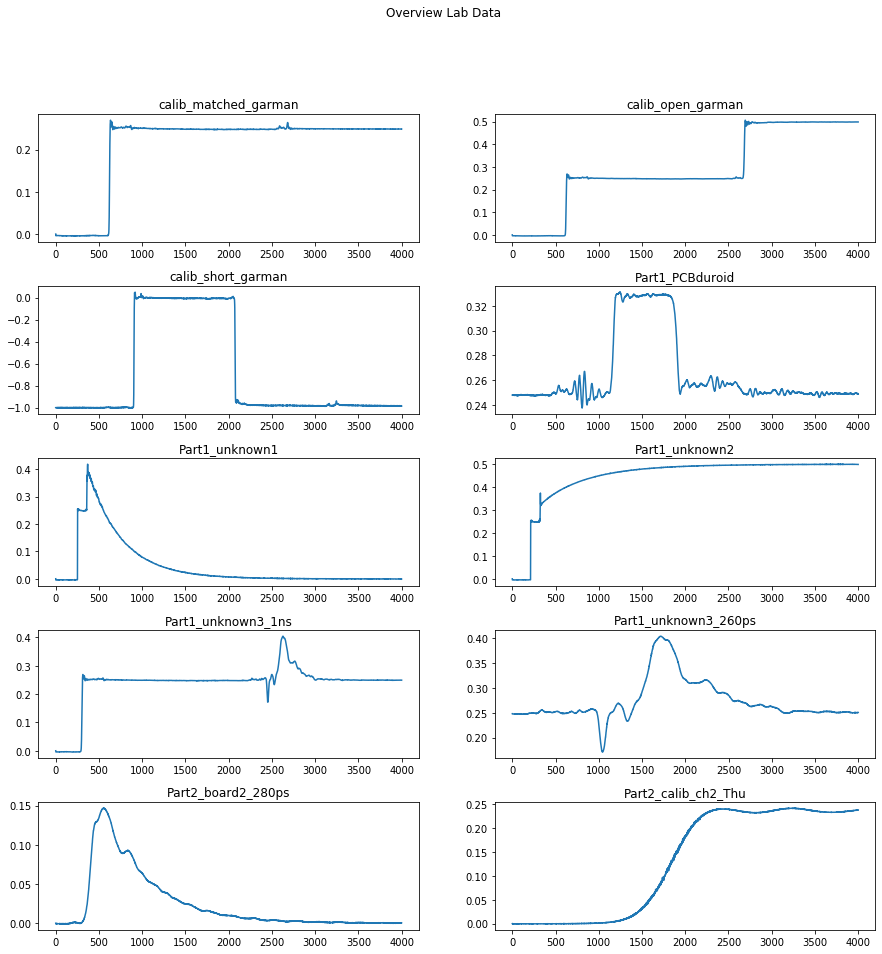

In [5]:
# Plot Overview
#   Number of points: 4000pts
#   Total Time: 200ns
#   Resolution: 0.05 ns/pt
#
fig,axs = plt.subplots(5,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.20)

axs[0,0].plot(calib_matched_garman)
axs[0,1].plot(calib_open_garman)
axs[1,0].plot(calib_short_garman)
axs[1,1].plot(Part1_PCBduroid)
axs[2,0].plot(Part1_unknown1)
axs[2,1].plot(Part1_unknown2)
axs[3,0].plot(Part1_unknown3_1ns)
axs[3,1].plot(Part1_unknown3_260ps)
axs[4,0].plot(Part2_board2_280ps)
axs[4,1].plot(Part2_calib_ch2_Thu)

axs[0,0].set_title('calib_matched_garman')
axs[0,1].set_title('calib_open_garman')
axs[1,0].set_title('calib_short_garman')
axs[1,1].set_title('Part1_PCBduroid')
axs[2,0].set_title('Part1_unknown1')
axs[2,1].set_title('Part1_unknown2')
axs[3,0].set_title('Part1_unknown3_1ns')
axs[3,1].set_title('Part1_unknown3_260ps')
axs[4,0].set_title('Part2_board2_280ps')
axs[4,1].set_title('Part2_calib_ch2_Thu')
plt.suptitle('Overview Lab Data');

<hr>

### Constants

- Permittivity of free-space $= \epsilon_0 = 8.854 \times 10^{-12} F/m$
- Permeability of free-space $= \mu_0 = 4\pi \times 10^{-7} H/m$
- Impedance of free-space $= \eta_0 = 120\pi = 376.7\Omega$
- Velocity of light in free-space $= c = 2.998 \times 10^8 m/s$

### Helpful Equations

$\begin{align}
\Gamma_L &= \frac{V^-}{V^+} = \frac{Z_L-Z_0}{Z_L+Z_0} 
\end{align}$

Velocity: $v = \frac{2L}{t} $ where $L$ = length and $t$ = round time delay

$\tau$ is time to reach $63.2\%$ of its final value in an increasing system and $36.8\%$ is a decreasing system.

Characteristic Impedance of TL: TEM

$\begin{eqnarray}
z_0 &=& \sqrt{\frac{L}{C}} &=& \sqrt{\frac{\mu}{\epsilon}}\\
v   &=& \frac{1}{\sqrt{LC}} &=& \frac{1}{\sqrt{\mu \epsilon}} &=& \frac{c_0}{\sqrt{\epsilon_r}}
\end{eqnarray}$

<hr>

### (1) TDS8200 setup 
Instructions
- Read the attached file for instruction
- Only Ch 1 must be set to TDR (red LED ON). Under MEASURE
- The red LED of Ch 2 must be OFF
- Time scale and number of points: These can be found from Setup->Hori

<hr>

### (2) Measurement of the verification devices
Instructions
- Attach SHORT to the end of cable and obtain the reflection from it
    - Save data into PC
- Attach the matched load and obtain the reflection from it
- Do not attach any devices and measure the reflection (OPEN)

Questions
- Find the reflection coefficient from the open, short and matched waveforms

ValueError: x and y must have same first dimension, but have shapes (4000,) and (4001, 1)

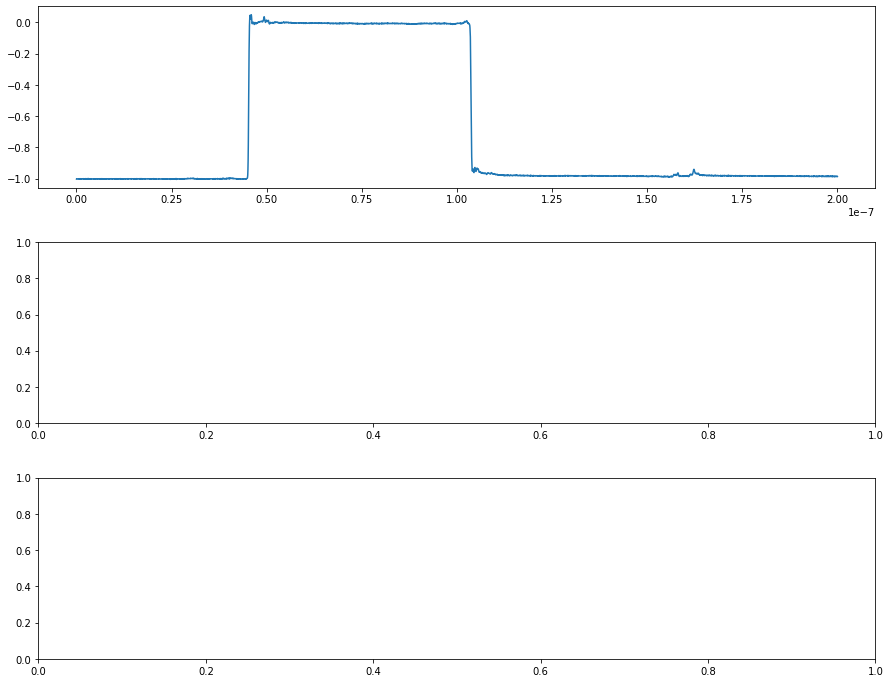

In [6]:
# Measured Values: Part1_unknown1
#
fig,axs = plt.subplots(3,1,figsize=(15,12))
plt.subplots_adjust(hspace=0.30)
x = np.linspace(0,200*10**(-9),len(calib_short_garman))

axs[0].plot(x,calib_short_garman,label='Short')
axs[1].plot(x,calib_matched_garman,label='Matched')
axs[2].plot(x,calib_open_garman,label='Open')

axs[0].set_ylabel('Short')
axs[1].set_ylabel('Matched')
axs[2].set_ylabel('Open')

axs[0].set_xlabel('t (s)')
axs[1].set_xlabel('t (s)')
axs[2].set_xlabel('t (s)')

axs[0].ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
axs[1].ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
axs[2].ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

plt.suptitle('Calibration Measured Values');

Reflection Coefficients

$\begin{align}
\Gamma_L &= \frac{V^-}{V^+}
\end{align}$

$\begin{align}
&V^+ =& -1.0V  && V^- &=& 1.0V && \rightarrow \Gamma_{short}  &=-1  \\
&V^+ =& 0.25V  && V^- &=& 0V     && \rightarrow \Gamma_{match}   &= 0  \\
&V^+ =& 0.25V  && V^- &=& 0.25V  && \rightarrow \Gamma_{open}  &= 1 
\end{align}$

<hr>

### (3) Unmatched transmission line
Instructions
- Connect a test board with the matched impedance (terminated with $Z_L=50$) and measure the reflection from it. 
    - Save data into PC.

Questions
- Identify the location of the impedance discontinuity and values of the characteristic impedance 
- From the measured time delay, estimate the dielectric constant and characteristic impedance of each TL section of the board

In [ ]:
# Measured Values: Part1_unknown1
#
fig,ax = plt.subplots(figsize=(12,4))
x = np.linspace(0,200*10**(-9),len(Part1_PCBduroid))
res = 0.05*10**(-9)

# Plot
ax.plot(x,Part1_PCBduroid,label='Measured Values')
ax.scatter(1125*res,Part1_PCBduroid[1125],color='red')
ax.scatter(1935*res,Part1_PCBduroid[1935],color='red',label='Impedance Discontinuity')

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Measured Values Part1_PCBduroid')
ax.set_xlabel('t (s)')
plt.legend()
plt.grid(True);

$\begin{align}
\Gamma_L &= \frac{V^-}{V^+} = \frac{Z_L-Z_0}{Z_L+Z_0} 
\end{align}$

$\Gamma_L = 0$ for load $Z_L = 50 \Omega$, thus $Z_0 = 50 \Omega$.

### (4) Unknown loads
Instructions
- Measure three unknown loads and save results.

Questions
- Using the analytical model, estimate the characteristics (capacitive, resistive, inductive, or combination of these?) and values of these loads. 
- See the expected responses and the time-domain responses of complex loads.

##### Part1_unknown1

![](images/shuntR_L.png)

In [ ]:
# Find V0 and Time Constant Response
#
V0 = max(Part1_unknown1)[0]
res = 0.05 # resolution = 0.05ns
x0 = np.argmax(Part1_unknown1)
# Tau = 36.8% * V0 = 0.1538
x1 = np.where((Part1_unknown1>0.153) & (Part1_unknown1<0.154))[0][0]

print(f'Initial Voltage = {round(V0,4)}V at t = 0')
print(f'Time Constant Response Value = {round(V0*0.368,4)}V at \
t = {round((x1-x0)*res,4)}ns')

In [ ]:
# Measured Values: Part1_unknown1
#
fig,ax = plt.subplots(figsize=(12,4))
x = np.linspace(0,200*10**(-9),len(Part1_unknown1))
res = 0.05*10**(-9)

# Plot
ax.plot(x,Part1_unknown1)
ax.scatter((x0-1)*res,Part1_unknown1[x0],color='red')
ax.scatter(x1*res,Part1_unknown1[x1],color='red')

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Measured Values Part1_unknown1')
ax.set_xlabel('t (s)')
plt.grid(True);

Known:

$\begin{align}
Z_0  &= 50 \\
Ei   &= 0.25 \\
V_0  &= 0.4179 \\
\tau &= 18.5 ns
\end{align}$

Solve: 

$\begin{align}
0.4179 &= E_i + E_i\frac{R-Z_0}{R+Z_0} & \rightarrow R &= 254.46 \Omega \\
\tau   &= \frac{R+Z_0}{RZ_0}L & \rightarrow L &= 773 nH
\end{align}$

In [ ]:
# Calculated Values
#
R = 254.46           # 220 ohms from 'Values of complex loads 2020-v2 better.pdf'
L = 773 *10**(-9)    # 786 nH   from 'Values of complex loads 2020-v2 better.pdf'
Z0 = 50
Ei = 0.25

# range:[-100ns,100ns] with resolution 0.05ns
t,width = np.linspace(-0.0000001,0.0000001,4000,endpoint=False,retstep=True)

In [ ]:
# Theoretical response
#
def shuntR_L(R,L,Z0,Ei,t):
    Tao = L*(Z0+R)/(Z0*R)
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*((1+const)*np.exp(-x/Tao))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

# Plot
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(t,shuntR_L(R,L,Z0,Ei,t))

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Theoretical Response shuntR_L')
ax.set_xlabel('t (s)')
plt.grid(True);

<hr>

##### Part1_unknown2

![](images/seriesR_C.png)

In [ ]:
# Find V0 and Time Constant Response
#
x0 = 330
V0 = Part1_unknown2[x0][0]
res = 0.05   # resolution = 0.05ns
# Tau = V0 + 63.2% * (2Ei-V0) = 0.4349
x1 = np.where((Part1_unknown2>0.43) & (Part1_unknown2<0.44))[0][0]

print(f'Initial Voltage = {round(V0,4)}V at t = 0')
print(f'Time Constant Response Value = {round(V0+(0.5-V0)*.632,4)}V at \
t = {round((x1-x0)*res,4)}ns')

In [ ]:
# Measured Values: Part1_unknown2
#
fig,ax = plt.subplots(figsize=(12,4))
x = np.linspace(0,200*10**(-9),len(Part1_unknown1))
res = 0.05*10**(-9)

# Plot
ax.plot(x,Part1_unknown2)
ax.scatter(x0*res,Part1_unknown2[x0],color='red')
ax.scatter(x1*res,Part1_unknown2[x1],color='red')

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Measured Values Part1_unknown2')
ax.set_xlabel('t (s)')
plt.grid(True);

Known:

$\begin{align}
Z_0  &= 50 \\
Ei   &= 0.25 \\
V_0  &= 0.3231 \\
\tau &= 24.5ns
\end{align}$

Solve: 

$\begin{align}
0.3231 &= E_i + E_i\frac{R-Z_0}{R+Z_0} & \rightarrow R &= 91.39 \Omega \\
\tau   &= (R+Z_0)C & \rightarrow C &= 0.163 nF
\end{align}$

In [ ]:
# Calculated Values
#
R = 91.39           # 100 Ohms
C = 0.163 *10**(-9) # 0.184 nF
Z0 = 50
Ei = 0.25
# range:[-100ns,100ns] with resolution 0.05ns
t = np.linspace(-0.0000001,0.0000001,4000) 

In [ ]:
# Theoretical Response Part1_unknown2
#
def seriesR_C(R,C,Z0,Ei,t):
    Tao = (R+Z0)*C
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*(2-(1-const)*np.exp(-x/Tao))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

# Plot
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(t,seriesR_C(R,C,Z0,Ei,t))

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Theoretical Response seriesR_C')
ax.set_xlabel('t (s)')
plt.grid(True);

<hr>

##### Part1_unknown3

![](images/seriesR_L.png)

In [ ]:
# Find V0 and Time Constant Response
#
res = 0.05
V0 = max(Part1_unknown3_1ns)[0]
x0 = np.argmax(Part1_unknown3_1ns)
#Part1_unknown3_1ns[x0][0] - 0.632 * (Part1_unknown3_1ns[x0][0]-0.25)
x1 = np.where((Part1_unknown3_1ns>0.30) & (Part1_unknown3_1ns<0.31))[0][-1]

print(f'Initial Voltage = {round(Part1_unknown3_1ns[x0][0],4)}V at t = 0')
print(f'Tau Response Value = {round(V0-(V0-0.25)*.632,4)}V at \
t = {round((x1-x0)*res,4)}ns')

In [ ]:
# Measured Values: Part1_unknown3
#
fig,ax = plt.subplots(figsize=(12,4))
x = np.linspace(0,200*10**(-9),len(Part1_unknown3_1ns))
res = 0.05*10**(-9)

# Plot
ax.plot(x,Part1_unknown3_1ns)
ax.scatter(x0*res,Part1_unknown3_1ns[x0],color='red')
ax.scatter(x1*res,Part1_unknown3_1ns[x1],color='red')

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Measured Values Part1_unknown3')
ax.set_xlabel('t (s)')
plt.grid(True);

Known:

$\begin{align}
Z_0  &= 50 \\
Ei   &= 0.25 \\
V_0  &= 0.4044 \\
\tau &= 7.9 ns
\end{align}$

Solve: 

$\begin{align}
E_i  &= (1+\frac{R-Z_0}{R+Z_0})E_i & \rightarrow R &= 50 \Omega \\
\tau &= \frac{L}{Z_0+R}            & \rightarrow L &= 790 nH
\end{align}$



In [ ]:
# Define range and function
a = 2550
b = 3000
n = b-a
f = Part1_unknown3_1ns

dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)

# plot
fig,ax = plt.subplots(figsize=(12,4))
for dx in dxs:
    dx = int(dx)
    midpoint = (f[dx]+f[dx+1])/2-0.25
    rect = pch.Rectangle((dx,0.25),width,midpoint[0],facecolor='#D3D3D3',edgecolor='grey')
    ax.add_artist(rect)
ax.plot(f)
ax.plot(dxs,f[a:b])

# labels
plt.xlabel('t')
plt.title('Area Approximation for Part1_unknown3_1ns');

In [ ]:
# Area Approximation to Calculate Inductance
#
def approx(f,a,b,n):
    '''
    Returns the integral approximation of f(x)dx from a to b
    f : continuous waveform
    a : starting point
    b : ending point
    '''
    apprx = 0
    dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)
    for dx in dxs:
        dx = int(dx)
        midpoint = (f[dx]+f[dx+1])/2-0.25 # Use the midpoint approximation
        apprx += width*midpoint # width is 1 nanosecond
    return apprx[0]*10**(-9)

a = 2550
b = 2950
n = b-a
f = Part1_unknown3_1ns
print(f'Area approximation is {approx(f,a,b,n)}')

In [ ]:
# Calculated Values
#
R = 50              # R = 50 Ohms
L = 790 *10**(-9)   # L = 29 nH
Ei = 0.25
Z0 = 50 
t = np.linspace(-0.0000001,0.0000001,4000)

In [ ]:
# Theoretical Response Part1_unknown3
#
def seriesR_L(R,L,Z0,Ei,t):
    Tao = L/(R+Z0)
    const = (R-Z0)/(R+Z0)
    x0 = t[t<=-0.00000005]
    x1 = t[(t>-0.00000005) & (t<=0)]
    x2 = t[t>0]
    y0 = lambda x: np.zeros(len(x))
    y1 = lambda x: Ei*np.ones(len(x))
    y2 = lambda x: Ei*((1+const)+(1-const)*np.exp(-x/Tao))
    return y0(x0).tolist()+\
            y1(x1).tolist()+\
            y2(x2).tolist()

In [ ]:
# Theoretical Time Values
#
vals = np.array(seriesR_L(R,L,Z0,Ei,t))
V0 = max(vals)
x0 = np.argmax(vals)
# Tau = V0 - 0.632*(V0-0.25) = 0.3417
x1 = np.where((vals>0.34) & (vals<0.35))[0][-1]

print(f'Initial Voltage = {round(vals[x0],4)}V at t = 0')
print(f'Time Constant Response Value = {round(V0-(V0-0.25)*.632,4)}V at \
t = {round((x1-x0)*res,4)}ns')

In [ ]:
# Theoretical Response
#
fig,ax = plt.subplots(figsize=(12,4))

# Plot
ax.plot(t,vals)
ax.scatter(np.array(1*10**(-10)),np.array(seriesR_L(R,L,Z0,Ei,np.array(1*10**(-10)))),color='red')
ax.scatter(np.array(8*10**(-9)),seriesR_L(R,L,Z0,Ei,np.array(8*10**(-9))),color='red')

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Theoretical Response seriesR_L')
ax.set_xlabel('t')
plt.grid(True);

### Small Inductance

Use property:

$\begin{eqnarray}
V      &=& && L \frac{di}{dt} \\
\int V &=& && L \int \frac{di}{dt} \\
area   &=& && L[I(\infty) - I(0)] \\
L      &=& && \frac{(area)}{DI} \\
L      &=& && \frac{(area)R_s}{DV}
\end{eqnarray}$

In [ ]:
# Measured Values: Part2_board2_280ps
#
fig,ax = plt.subplots(figsize=(12,4))
x = np.linspace(0,200*10**(-9),len(Part1_unknown3_1ns))
res = 0.05*10**(-9)

# Plot
ax.plot(x,Part2_board2_280ps)

# Labels
ax.ticklabel_format(axis='x',style='sci', scilimits=(-9,-9))
ax.set_title('Measured Values Part2_board2_280ps')
ax.set_xlabel('t (ns)')
plt.grid(True);

In [ ]:
# Area Approximation Part2_board2_280ps Plot

# Define range and function
a = 250
b = 3000
n = b-a
f = Part2_board2_280ps

dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)

# plot
fig,ax = plt.subplots(figsize=(12,4))
for dx in dxs:
    dx = int(dx)
    midpoint = (f[dx]+f[dx+1])/2
    rect = pch.Rectangle((dx,0),width,midpoint[0],facecolor='#D3D3D3',edgecolor='grey')
    ax.add_artist(rect)
ax.plot(f)
ax.plot(dxs,f[a:b])

# labels
plt.xlabel('t')
plt.title('Area Approximation for Part2_board2_280ps');

In [ ]:
# Area Approximation Part2_board2_280ps Calculation
#
def approx(f,a,b,n):
    '''
    Returns the integral approximation of f(x)dx from a to b
    f : continuous waveform
    a : starting point
    b : ending point
    '''
    apprx = 0
    dxs,width = np.linspace(a,b,n,endpoint=False,retstep=True)
    for dx in dxs:
        dx = int(dx)
        midpoint = (f[dx]+f[dx+1])/2 # Use the midpoint approximation
        apprx += width*midpoint # width is 1 nanosecond
    return apprx[0]*10**(-9)

a = 250
b = 3000
n = b-a
f = Part2_board2_280ps
print(f'Area approximation is {approx(f,a,b,n)}')